# Mortgage Calculator

In [75]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

### All the calculations in this hidden cell:

In [147]:
def buy_vs_rent(home_price,down_payment,interest_rate_percent,term,monthly_insurance,monthly_taxes,rental_amount,value_increase_rate):
    num_payments = term * 12
    loan_amount = home_price - down_payment
    interest_rate = interest_rate_percent/100
    monthly_interest_rate = interest_rate/12
    monthly_mortgage_payment = loan_amount/((((1+monthly_interest_rate)**num_payments)-1)/  \
                                   (monthly_interest_rate*(1+monthly_interest_rate)**num_payments))
    total_monthly_payment = monthly_mortgage_payment+ monthly_taxes + monthly_insurance
    print('Monthly Mortgage =     ',round(monthly_mortgage_payment))
    print('Monthly Taxes =        ',monthly_taxes)
    print('Monthly Insurance =    ',monthly_insurance)
    print('---------------------------------------')
    print('Total Monthly Payment =',round(total_monthly_payment))

    interest_paid = []
    balance_left = []
    principal_paid = []
    balance = loan_amount
    monthly_cost_tipping_point = 0 #'\u221e'
    total_principal = down_payment
    total_principal_list = []
    monthly_value_increase_rate = (value_increase_rate/100)/12
    value_increase = 0
    value_increase_list = []
    savings = down_payment + closing_costs
    rent_savings_list = []
    principal_savings_diff = []
    value_savings_diff = []
    for month in range(num_payments):
        monthly_interest = balance*monthly_interest_rate
        monthly_principal = monthly_mortgage_payment - monthly_interest
        wasted_money = monthly_interest + monthly_insurance + monthly_taxes

        balance -= monthly_principal
        interest_paid.append(monthly_interest)
        balance_left.append(balance)
        principal_paid.append(monthly_principal)

        if abs(wasted_money - rental_amount)< 50:
            monthly_cost_tipping_point = round(month/12)
        if abs(total_principal + value_increase - savings) < 50:
            value_vs_savings_tipping_point = round(month/12)
            
        total_principal += monthly_principal
        value_increase += total_principal * monthly_value_increase_rate
        value_increase_list.append(value_increase)
        total_principal_list.append(total_principal)

        #rent_savings = wasted_money - rental_amount
        savings += total_monthly_payment - rental_amount
        rent_savings_list.append(savings)
        principal_savings_diff.append(total_principal-savings)
        value_savings_diff.append(total_principal+value_increase-savings)

    print()
    print(f'Monthly wasted money becomes less than rent after {monthly_cost_tipping_point} years')
    print()
    print(f'Home value exceeds possible savings by year {value_vs_savings_tipping_point}')
    monthly_insurance_list = [monthly_insurance for n in range(num_payments)]
    monthly_tax_list = [monthly_taxes for n in range(num_payments)]
    years = [n/12 for n in range(num_payments)]
    
    fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,10))
    ax1.stackplot(years,interest_paid,monthly_insurance_list,monthly_tax_list,principal_paid, \
                  labels = ['Interest','Insurance','Taxes','Principal'])
    ax1.plot(years,[rental_amount for year in years],color = 'black', label = 'Rent')
    ax1.legend(loc = 'upper right')
    ax1.set(xlabel='Years',title = 'Monthly Costs')
    ax1.ticklabel_format(style = 'plain')

    ax2.stackplot(years,total_principal_list,value_increase_list, labels = ['Principal', 'Added Value'])

    ax2.plot(years,rent_savings_list,color = 'black', label = 'Savings w/out buying')
    ax2.legend(loc = 'upper left');
    ax2.set(xlabel='Years',title = 'Home Value vs. Savings Only')
    ax2.ticklabel_format(style = 'plain')
    
    
    ax3.plot(years,principal_savings_diff, label = 'Principle minus Savings')
    ax3.plot(years,value_savings_diff, label = 'Value minus Savings')
    ax3.plot(years,[0 for y in years], color = 'black')
    ax3.legend(loc = 'upper left')
    ax3.set(xlabel='Years',title = 'Difference Between Home Value/Principal and Savings',ylim = [-20000,100000])
    ax3.ticklabel_format(style = 'plain')
    
    
    fig.suptitle(f'Buy vs Rent for a ${str(home_price)[:3]}k house with an annual value increase of {round(value_increase_rate)}%', fontsize=16)

## Common Parameters

In [148]:
down_payment = home_price * 0.2
interest_rate_percent = 3.8 # Percent
term = 30 # Years
monthly_insurance = 350 # Dollars
monthly_taxes = 350 # Dollars
closing_costs = 5000

rental_amount = 2000 # For Rent vs. Buy Comparison
value_increase_rate = 2.8 #100*((545-225)/225)/10 # Percent (Average value increase in CO from 2012 to 2022 is 14.2%, minimum 1 year increase was 2.8%)

Monthly Mortgage =      2237
Monthly Taxes =         350
Monthly Insurance =     350
---------------------------------------
Total Monthly Payment = 2937

Monthly wasted money becomes less than rent after 8 years

Home value exceeds possible savings by year 3


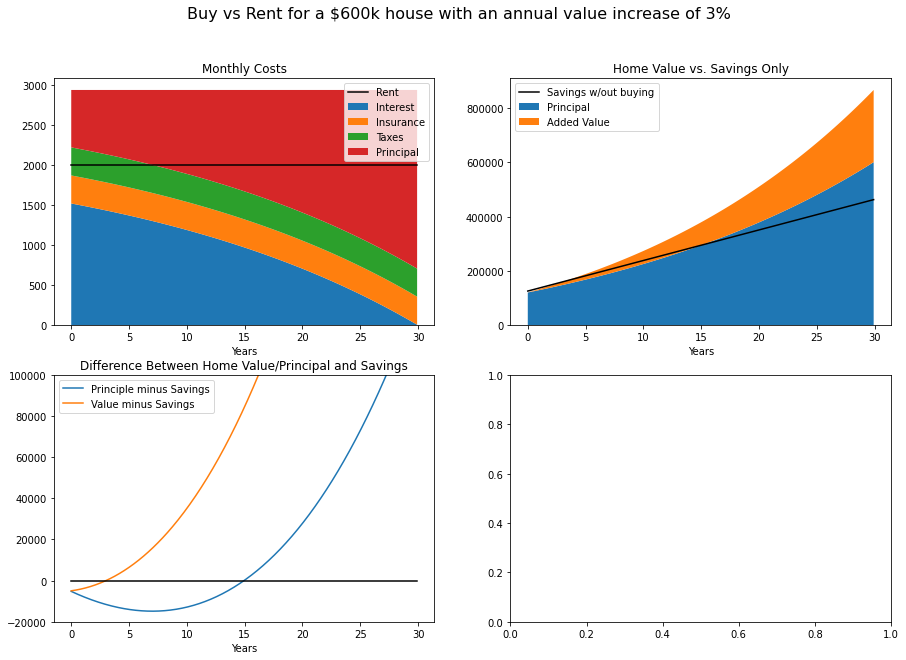

In [149]:
home_price = 600000 # Dollars
buy_vs_rent(home_price,down_payment,interest_rate_percent,term,monthly_insurance,monthly_taxes,rental_amount,value_increase_rate)

## Monthly Mortgage Payment Calculation
Based on [this](https://www.thebalance.com/loan-payment-calculations-315564) website

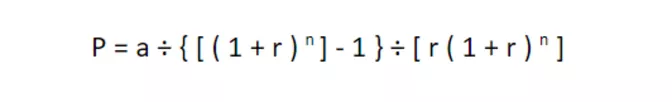!

Where P = Monthly Payment, a = Loan Amount, r = Periodic Interest Rate, n = Number of Payments

# Home Values in Colorado
Average home value increase since 2012 is 14.2%

The slowest year colorado has had since 2012 was 2019 at 2.8%

Info found [here](https://www.zillow.com/co/home-values/)

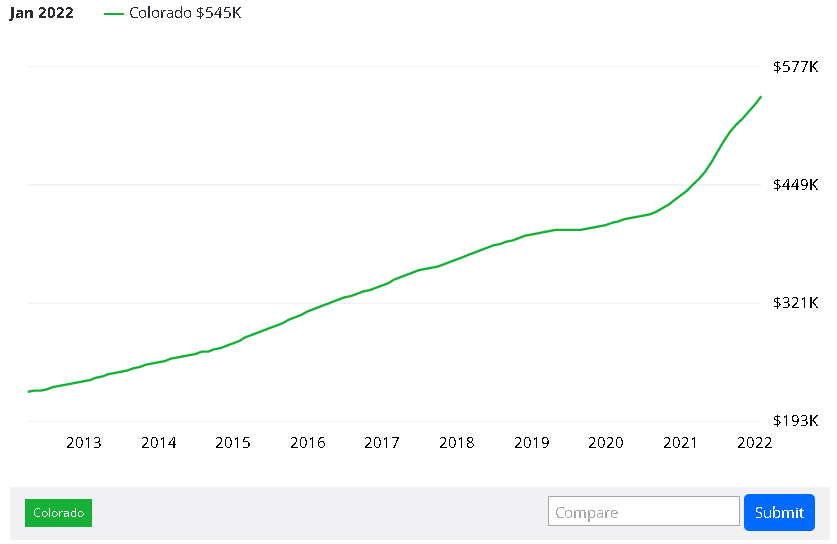